In [12]:
data = read.csv("D:/Project/Dataset1.csv")

In [13]:
print(colnames(data))

[1] "ï..Cement..kg.m3."                   
[2] "Blast.furnace.Slag..kg.m3."          
[3] "Fly.Ash..kg.m3."                     
[4] "Water..kg.m3."                       
[5] "Super.plasticizer..kg.m3."           
[6] "Coarse.Aggregate...kg.m3."           
[7] "Fine.Aggregate..kg.m3."              
[8] "Age.of.testing..day."                
[9] "Concrete.compressive.strength..MPa.."


In [14]:
colnames(data)[1] <- "CEMENT"
colnames(data)[2] <- "Blast.furance.Slag"
colnames(data)[3] <- "Fly.ash"
colnames(data)[4] <- "Water"
colnames(data)[5] <- "Super.plasticizer"
colnames(data)[6] <- "Coarse.Aggregate"
colnames(data)[7] <- "Fine.Agrregate"
colnames(data)[8] <- "Age.of.testing.day"
colnames(data)[9] <- "Concrete.compressive.strength"
str(data)

'data.frame':	1133 obs. of  9 variables:
 $ CEMENT                       : num  336 140 350 162 225 ...
 $ Blast.furance.Slag           : num  0 4.2 0 148 0 134 190 192 24 0 ...
 $ Fly.ash                      : num  0 216 0 190 0 ...
 $ Water                        : num  182 194 203 179 181 ...
 $ Super.plasticizer            : num  3 4.7 0 19 0 ...
 $ Coarse.Aggregate             : num  986 1050 974 838 1113 ...
 $ Fine.Agrregate               : num  817 710 775 741 833 ...
 $ Age.of.testing.day           : int  28 28 14 28 7 28 28 7 7 28 ...
 $ Concrete.compressive.strength: num  44.9 26.4 22.5 42.1 11.2 ...


In [15]:
 anyNA(data)

[1] FALSE

In [16]:
dataclean = data

In [17]:
summary(dataclean)

     CEMENT      Blast.furance.Slag    Fly.ash           Water      
 Min.   :102.0   Min.   :  0.00     Min.   :  0.00   Min.   :121.8  
 1st Qu.:190.0   1st Qu.:  0.00     1st Qu.:  0.00   1st Qu.:167.0  
 Median :266.0   Median : 26.00     Median :  0.00   Median :185.7  
 Mean   :276.5   Mean   : 74.27     Mean   : 62.81   Mean   :183.0  
 3rd Qu.:342.0   3rd Qu.:141.30     3rd Qu.:121.97   3rd Qu.:193.8  
 Max.   :540.0   Max.   :359.40     Max.   :260.00   Max.   :247.0  
 Super.plasticizer Coarse.Aggregate Fine.Agrregate  Age.of.testing.day
 Min.   : 0.000    Min.   : 708.0   Min.   :594.0   Min.   :  1.00    
 1st Qu.: 0.000    1st Qu.: 919.0   1st Qu.:720.0   1st Qu.: 14.00    
 Median : 6.700    Median : 966.8   Median :777.5   Median : 28.00    
 Mean   : 6.416    Mean   : 964.8   Mean   :770.5   Mean   : 44.06    
 3rd Qu.:10.160    3rd Qu.:1026.6   3rd Qu.:821.0   3rd Qu.: 28.00    
 Max.   :32.200    Max.   :1145.0   Max.   :992.6   Max.   :365.00    
 Concrete.compressiv

In [18]:
library(tidyr)
library(ggplot2)

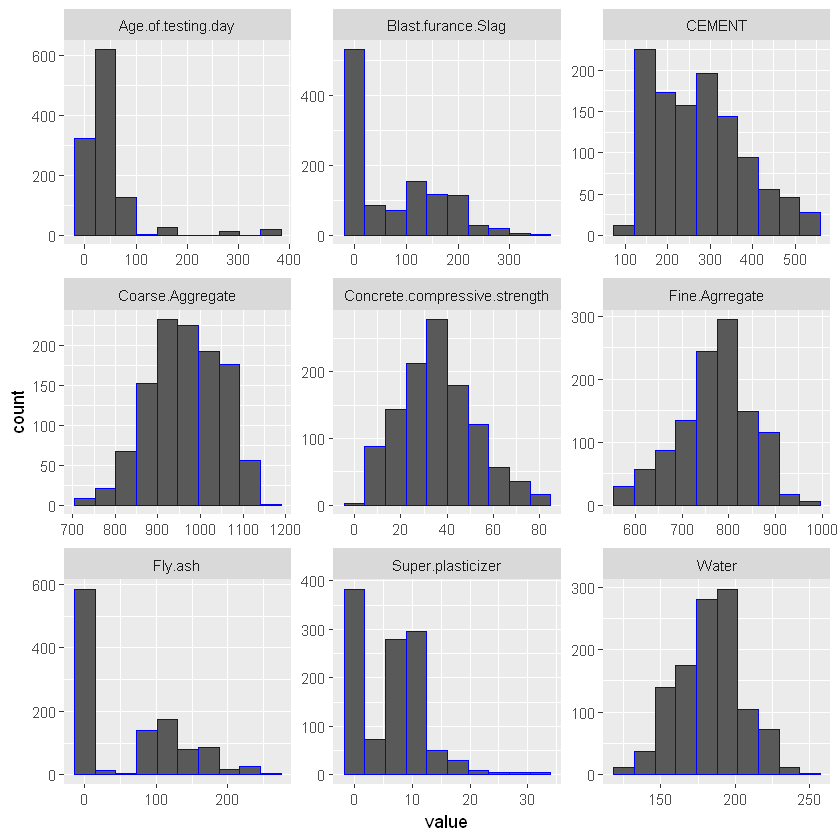

In [29]:
ggplot(gather(dataclean),aes(value))+geom_histogram(bins=10,col="blue")+facet_wrap(~key,scales='free')

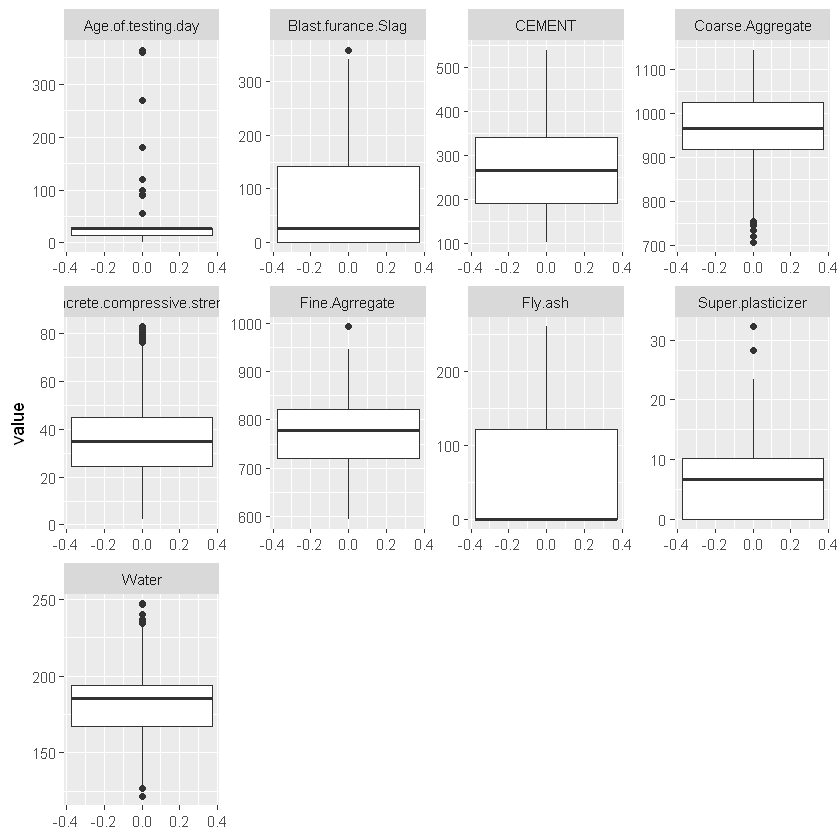

In [19]:
ggplot(gather(dataclean),aes(,value))+geom_boxplot()+facet_wrap(~key,scales="free",ncol=4)

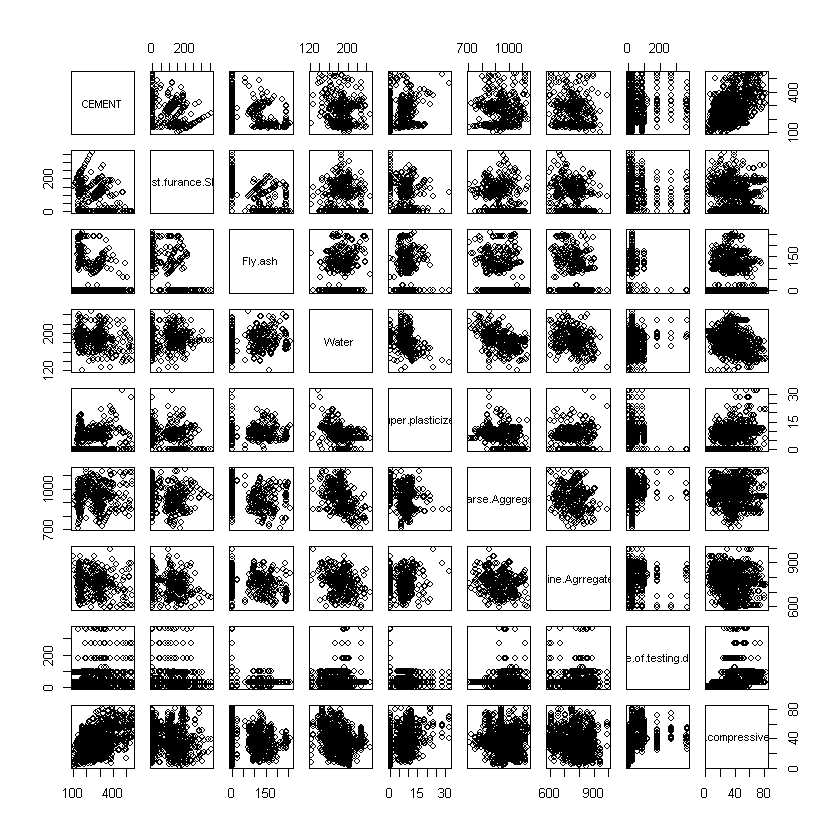

In [20]:
pairs(dataclean)

In [21]:
Blast.furance.Slag <-  which(dataclean$Blast.furance.Slag  %in% boxplot(dataclean$Blast.furance.Slag , plot=FALSE)$out)
Fly.ash <- which(dataclean$Fly.ash %in% boxplot(dataclean$Fly.ash, plot=FALSE)$out)
Water <- which(dataclean$Water %in% boxplot(dataclean$Water, plot=FALSE)$out)
Super.plasticizer <- which(dataclean$Super.plasticizer  %in% boxplot(dataclean$Super.plasticizer , plot=FALSE)$out)
Coarse.Aggregate  <-  which(dataclean$Coarse.Aggregate   %in% boxplot(dataclean$Coarse.Aggregate  , plot=FALSE)$out)
Fine.Agrregate  <-  which(dataclean$Fine.Agrregate    %in% boxplot(dataclean$Fine.Agrregate   , plot=FALSE)$out)
Age.of.testing.day <-  which(dataclean$Age.of.testing.day    %in% boxplot(dataclean$Age.of.testing.day  , plot=FALSE)$out)

In [22]:
dataclean2 <- dataclean[-c(Blast.furance.Slag,Fly.ash,Water,Super.plasticizer,Coarse.Aggregate,Fine.Agrregate,Age.of.testing.day),]
nrow(dataclean2)


[1] 821

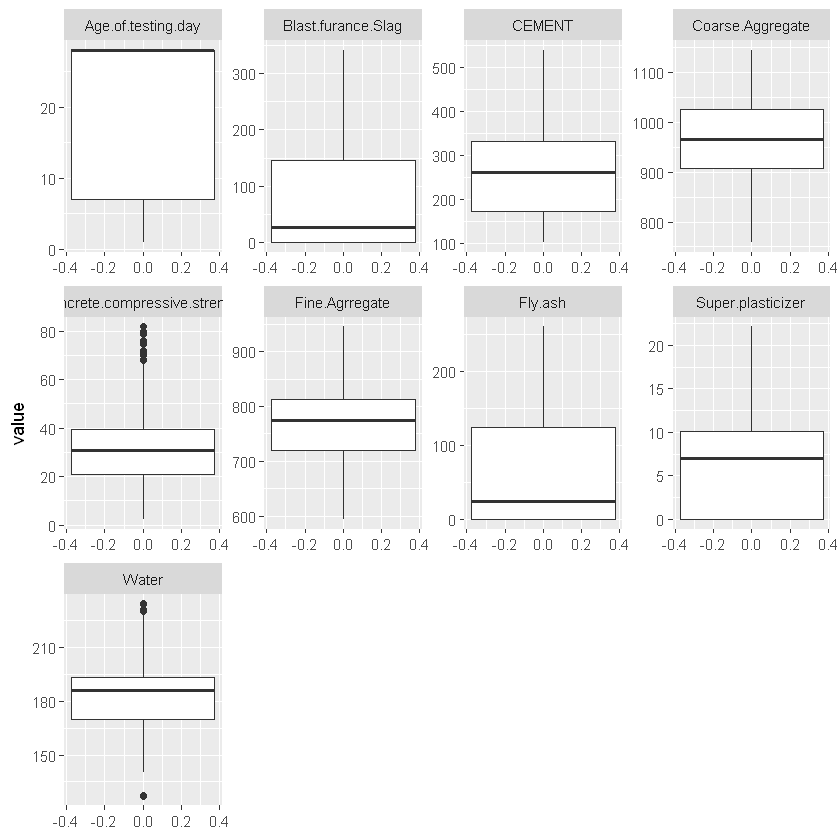

In [34]:
ggplot(gather(dataclean2),aes(,value))+geom_boxplot()+facet_wrap(~key,scales="free",ncol=4)


corrplot 0.84 loaded


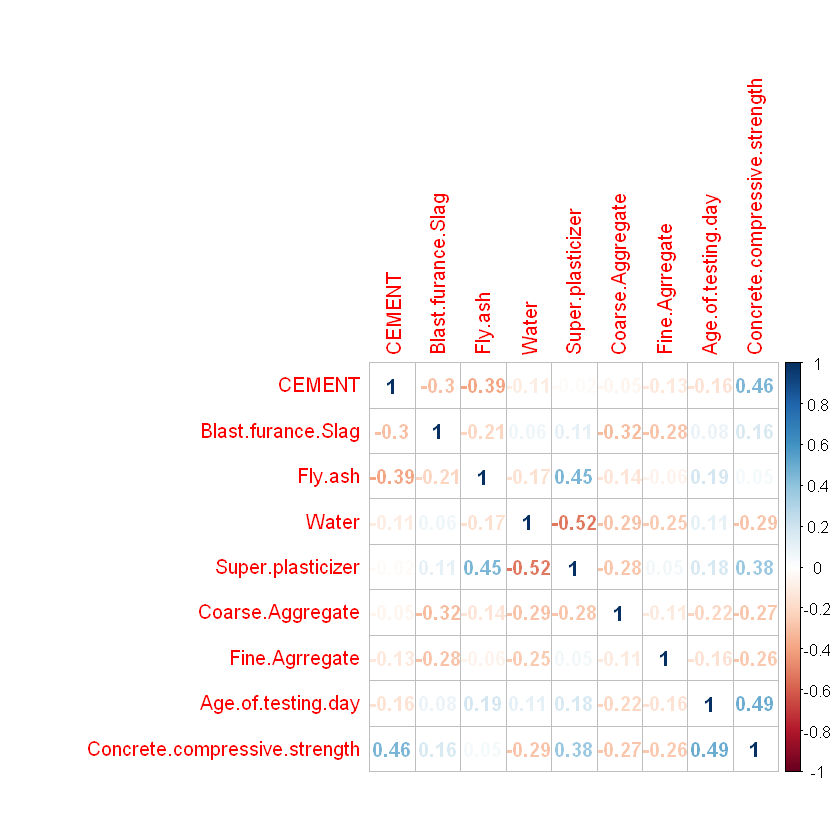

In [23]:
library(corrplot)
M <- cor(dataclean2, method = 'spearman')
corrplot(M,method = 'number')

In [28]:
CEMENT_Concrete.compressive.strength <- cor.test(dataclean2$CEMENT,dataclean2$Concrete.compressive.strength,method = "spearman")



Warning message in cor.test.default(dataclean2$CEMENT, dataclean2$Concrete.compressive.strength, :
"Cannot compute exact p-value with ties"

In [29]:
CEMENT_Concrete.compressive.strength$p.value

[1] 4.137365e-44

In [30]:
CEMENT_Concrete.compressive.strength$estimate*sqrt(939/(1-CEMENT_Concrete.compressive.strength$estimate^2))

rho 
15.85023

In [31]:
Age.of.testing.day_Concrete.compressive.strength <- cor.test(dataclean2$Age.of.testing.day,dataclean2$Concrete.compressive.strength,method = "spearman")


Warning message in cor.test.default(dataclean2$Age.of.testing.day, dataclean2$Concrete.compressive.strength, :
"Cannot compute exact p-value with ties"

In [32]:
Age.of.testing.day_Concrete.compressive.strength$p.value

[1] 1.670783e-51

In [33]:
Age.of.testing.day_Concrete.compressive.strength$estimate*sqrt(939/(1-Age.of.testing.day_Concrete.compressive.strength$estimate^2))

rho 
17.36505

In [35]:
Super.plasticizer_Fly.ash <-  cor.test(dataclean2$Super.plasticizer,dataclean2$Fly.ash,method = "spearman")

Warning message in cor.test.default(dataclean2$Super.plasticizer, dataclean2$Fly.ash, :
"Cannot compute exact p-value with ties"

In [36]:
Super.plasticizer_Fly.ash$p.value

[1] 1.557687e-42

In [37]:
Super.plasticizer_Fly.ash$estimate*sqrt(939/(1-Super.plasticizer_Fly.ash$estimate^2))

rho 
15.51704

In [39]:
Super.plasticizer_Water <-  cor.test(dataclean2$Super.plasticizer,dataclean2$Water, method = "spearman")
                                     

Warning message in cor.test.default(dataclean2$Super.plasticizer, dataclean2$Water, :
"Cannot compute exact p-value with ties"

In [41]:
Super.plasticizer_Water$p.value

[1] 3.049787e-58

In [42]:
Super.plasticizer_Water$estimate*sqrt(939/(1-Super.plasticizer_Water$estimate^2))

rho 
-18.68908